<a href="https://colab.research.google.com/github/vaibhavraok/GNCIPL-internship/blob/main/MNIST_Digit_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install -q kagglehub[pandas-datasets] tensorflow scikit-learn matplotlib seaborn


In [10]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [11]:
DATASET_SLUG = "oddrationale/mnist-in-csv"
TRAIN_FILE   = "mnist_train.csv"
TEST_FILE    = "mnist_test.csv"

print("Downloading MNIST dataset…")
df_train = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, DATASET_SLUG, TRAIN_FILE)
df_test  = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, DATASET_SLUG, TEST_FILE)

print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)

display(df_train.head())


/tmp/ipython-input-4050965370.py:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_train = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, DATASET_SLUG, TRAIN_FILE)
/tmp/ipython-input-4050965370.py:7: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_test  = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, DATASET_SLUG, TEST_FILE)


Train shape: (60000, 785)
Test shape: (10000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Features and labels
X = df_train.drop("label", axis=1).values
y = df_train["label"].values

# Train/test split (we already have separate test, but splitting again for validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(df_test.drop("label", axis=1).values)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_val   = to_categorical(y_val, num_classes=10)
y_test  = to_categorical(df_test["label"].values, num_classes=10)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (48000, 784)
y_train shape: (48000, 10)


In [13]:
model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")  # 10 digits
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=128,
    verbose=1
)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.8267 - loss: 0.5868 - val_accuracy: 0.9529 - val_loss: 0.1701
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9652 - loss: 0.1173 - val_accuracy: 0.9637 - val_loss: 0.1394
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9781 - loss: 0.0720 - val_accuracy: 0.9653 - val_loss: 0.1419
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9864 - loss: 0.0458 - val_accuracy: 0.9685 - val_loss: 0.1300
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9900 - loss: 0.0342 - val_accuracy: 0.9690 - val_loss: 0.1315
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9933 - loss: 0.0233 - val_accuracy: 0.9723 - val_loss: 0.1291
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9952 - loss: 0.0167 - val_accuracy: 0.9714 - val_loss: 0.1413
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9967 - loss: 0.0143 - val_accuracy: 0

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f" Test Accuracy: {test_acc:.4f}")


 Test Accuracy: 0.9669


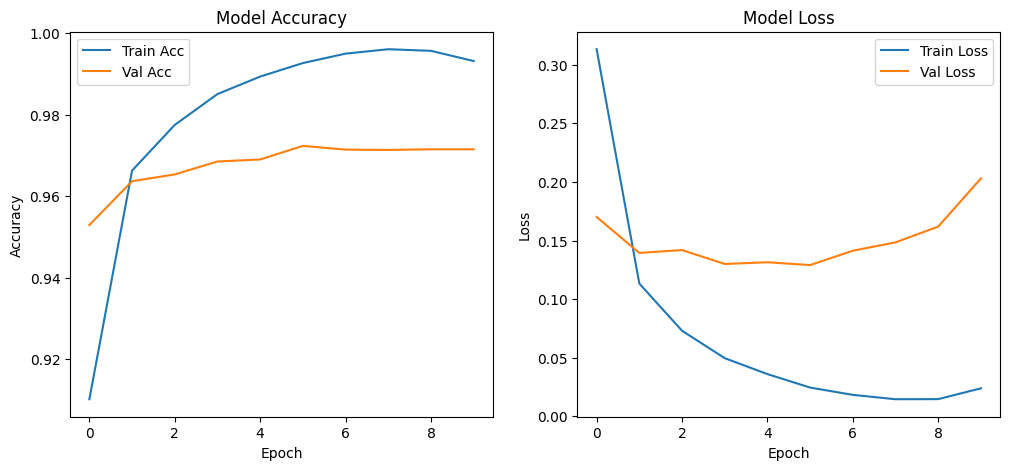

In [16]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


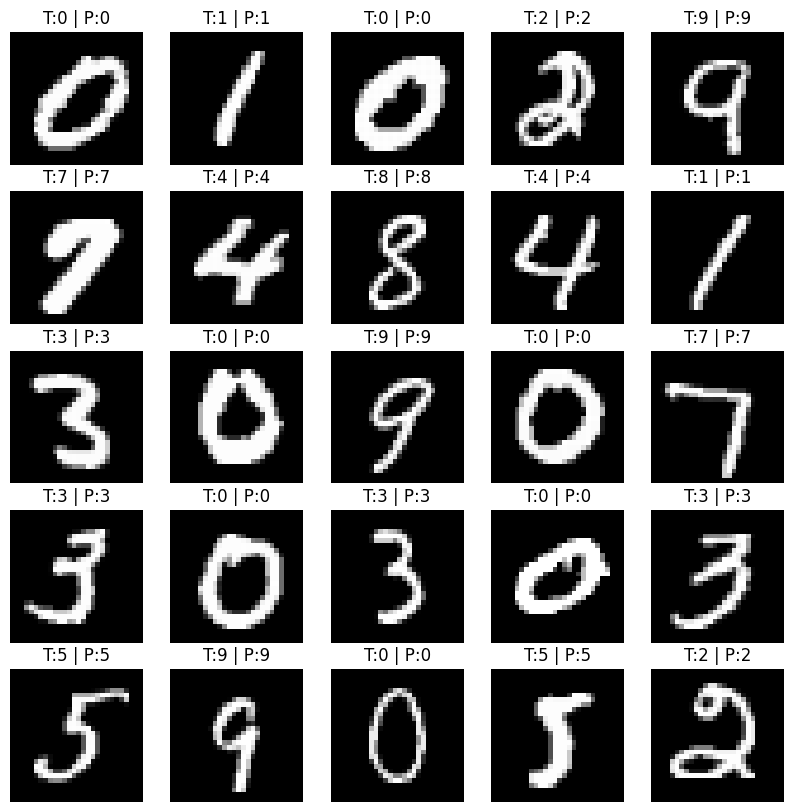

In [17]:
# Pick 25 random samples from test set
indices = random.sample(range(len(X_test)), 25)
images = df_test.drop("label", axis=1).iloc[indices].values
true_labels = df_test["label"].iloc[indices].values

pred_probs = model.predict(X_test[indices])
pred_labels = np.argmax(pred_probs, axis=1)

plt.figure(figsize=(10,10))
for i, idx in enumerate(indices):
    plt.subplot(5,5,i+1)
    plt.imshow(images[i].reshape(28,28), cmap="gray")
    plt.title(f"T:{true_labels[i]} | P:{pred_labels[i]}")
    plt.axis("off")
plt.show()
